# A two-dimensional four-branch serial system (Waarts, 2000)

## References

* [1] Waarts, P.-H. (2000). "Structural reliability using finite element methods: an appraisal of
DARS: Directional Adaptive Response Surface Sampling." PhD thesis. Technical University of Delft, The Netherlands.
* [2] Dubourg, V. (2011). "Adaptive surrogate models for reliability analysis and reliability-based design
optimization". PhD thesis. Université Blaise Pascal – Clermont II.

## Numerical example with OpenTURNS

In [1]:
import openturns as ot
import numpy as np

In [2]:
## Input probabilistic model
x0 = ot.Normal(0.0, 1.0)
x1 = ot.Normal(0.0, 1.0)
inputDistribution = ot.ComposedDistribution((x0, x1))
inputRandomVector = ot.RandomVector(inputDistribution)

In [3]:
## Limit-state function
formulaList = [
    "var y0 := 3 + 0.1 * (x0 - x1)^2 - (x0 + x1) / sqrt(2)",
    "var y1 := 3 + 0.1 * (x0 - x1)^2 + (x0 + x1) / sqrt(2)",
    "var y2 := x0 - x1 + 7 / sqrt(2)",
    "var y3 := x1 - x0 + 7 / sqrt(2)",
    "y := min(y0,y1,y2,y3)",
]
formula = ";".join(formulaList)
waartsfunction = ot.SymbolicFunction(["x0", "x1"], ["y"], formula)

In [4]:
waartsfunction([2.1, 2.1])

class=Point name=Unnamed dimension=1 values=[0.0301515]

In [5]:
## Creation d'une PythonFunction
def waartsfunction_py(x):
    y0 = 3 + 0.1 * (x[0] - x[1]) ** 2 - (x[0] + x[1]) / (2 ** 0.5)
    y1 = 3 + 0.1 * (x[0] - x[1]) ** 2 + (x[0] + x[1]) / (2 ** 0.5)
    y2 = x[0] - x[1] + 7 / (2 ** 0.5)
    y3 = x[1] - x[0] + 7 / (2 ** 0.5)
    y = min(y0, y1, y2, y3)
    return [y]

In [6]:
yy = waartsfunction_py([2.1, 2.1])
yy

[0.030151519016500483]

In [7]:
myfunction = ot.PythonFunction(2, 1, waartsfunction_py)
myfunction([2.1, 2.1])

class=Point name=Unnamed dimension=1 values=[0.0301515]

In [8]:
outputVect = ot.CompositeRandomVector(myfunction, inputRandomVector)

In [9]:
montecarlosize = 1000
outputSample = outputVect.getSample(montecarlosize)

In [10]:
histo = ot.HistogramFactory().build(outputSample)

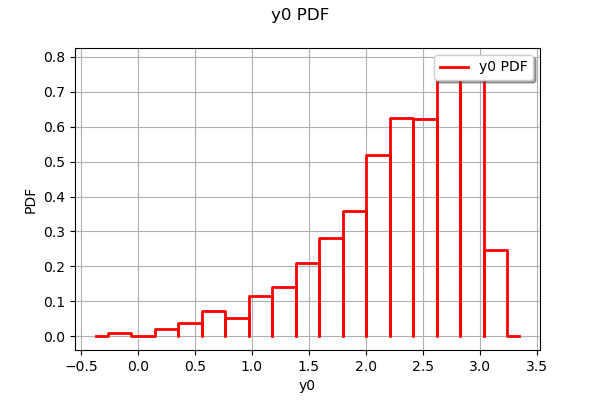

In [11]:
histo.drawPDF()